In [1]:
import os
import sys
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
data = pd.read_csv("job.csv", 
                   header=0, infer_datetime_format=True, parse_dates=['date'], index_col=['date']
                  ).iloc[:,1:]

In [4]:
new = data.iloc[3:,:]

In [5]:
x = np.array(new.iloc[:,7:])
y = np.array(new.iloc[:,:7])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
model.predict(x_test)[:3]

array([[ 3.55078125,  9.46875   , 17.375     , 25.53125   , 33.7578125 ,
        41.79296875, 25.8125    ],
       [ 4.875     , 12.0625    , 21.25      , 30.0078125 , 38.8671875 ,
        46.0625    , 22.8125    ],
       [ 3.8984375 ,  9.625     , 18.25      , 27.6015625 , 37.7109375 ,
        45.8515625 , 24.1875    ]])

In [11]:
y_pred = model.predict(x_test);y_pred[:3]

array([[ 3.55078125,  9.46875   , 17.375     , 25.53125   , 33.7578125 ,
        41.79296875, 25.8125    ],
       [ 4.875     , 12.0625    , 21.25      , 30.0078125 , 38.8671875 ,
        46.0625    , 22.8125    ],
       [ 3.8984375 ,  9.625     , 18.25      , 27.6015625 , 37.7109375 ,
        45.8515625 , 24.1875    ]])

In [12]:
def youspinmerightroundbabyrightround(y_pred,y_test):
    for i in range(len(y_pred)):
        for h in range(len(y_pred[i])):
            y_pred[i][h] = round(y_pred[i][h])
    print(y_pred[:3])
    print("+++++++++++++++++++++++++++++++++")
    print(np.array(y_test[:3]))
    return y_pred

In [13]:
def boringestimation(y_test,y_pred):
    s = r2_score(y_test,y_pred)
    m = mean_squared_error(y_test,y_pred)
    n = np.sqrt(mean_squared_error(y_test,y_pred))
    print("r2:",s,";mean sqrt err:",m,";root mean sqrt err:",n)
#     return (s,m,n)

In [14]:
boringestimation(y_test,y_pred)

r2: 0.5759237659473607 ;mean sqrt err: 43.15257227572558 ;root mean sqrt err: 6.569061750031398


In [15]:
import torch
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim

In [16]:
def arr2f(data):
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = float(data[i][j])
    return data

In [17]:
makeup = np.array(new.iloc[:1414,7:]).tolist()

In [18]:
model = nn.Sequential(
    nn.Linear(7, 14),
    nn.ReLU(),
    nn.Linear(14, 28),
    nn.ReLU(),
    nn.Linear(28, 56),
    nn.ReLU(),
    nn.Linear(56, 28),
    nn.ReLU(),
    nn.Linear(28, 14),
    nn.ReLU(),
    nn.Linear(14, 7)
)

In [19]:
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [21]:
import tqdm
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [22]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32)

In [23]:
n_epochs = 100   # number of epochs to run
batch_size = 25  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

In [24]:
best_mse = np.inf   # init to infinity
best_weights = None
history = []
import copy

In [25]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            Y_batch = Y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, Y_batch)
#             print("y_pred")
#             print(y_pred)
#             print("loss")
#             print(loss)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
#     print("@@@@@@@@@@@@@@@@@@@@@@@@@")
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, Y_test)
    mse = float(mse)
#     print(mse)
#     print(best_mse)
#     print(y_pred)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 55.41
RMSE: 7.44


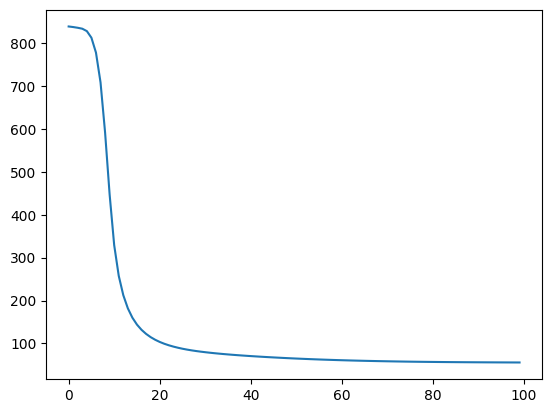

In [26]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()